In [70]:
import pandas as pd
import numpy as np

df=pd.read_csv('rETH_market_price.csv')
df.head()

,Unnamed: 0,reth_fair_value,reth_market_price,reth_premium,time
0,0,1.067560,1.067438,0.999886,2023-04-25T17:40:47Z
1,1,1.067560,1.067438,0.999886,2023-04-25T17:20:35Z
2,2,1.067560,1.067438,0.999886,2023-04-25T17:19:11Z
3,3,1.067435,1.067438,1.000003,2023-04-25T15:54:47Z
4,4,1.067435,1.067438,1.000003,2023-04-25T15:50:35Z


In [71]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe

format_k = lambda x, pos: f'{x/10**3:,.0f}K'

plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

Text(0.5, 1.0, 'rETH premium')

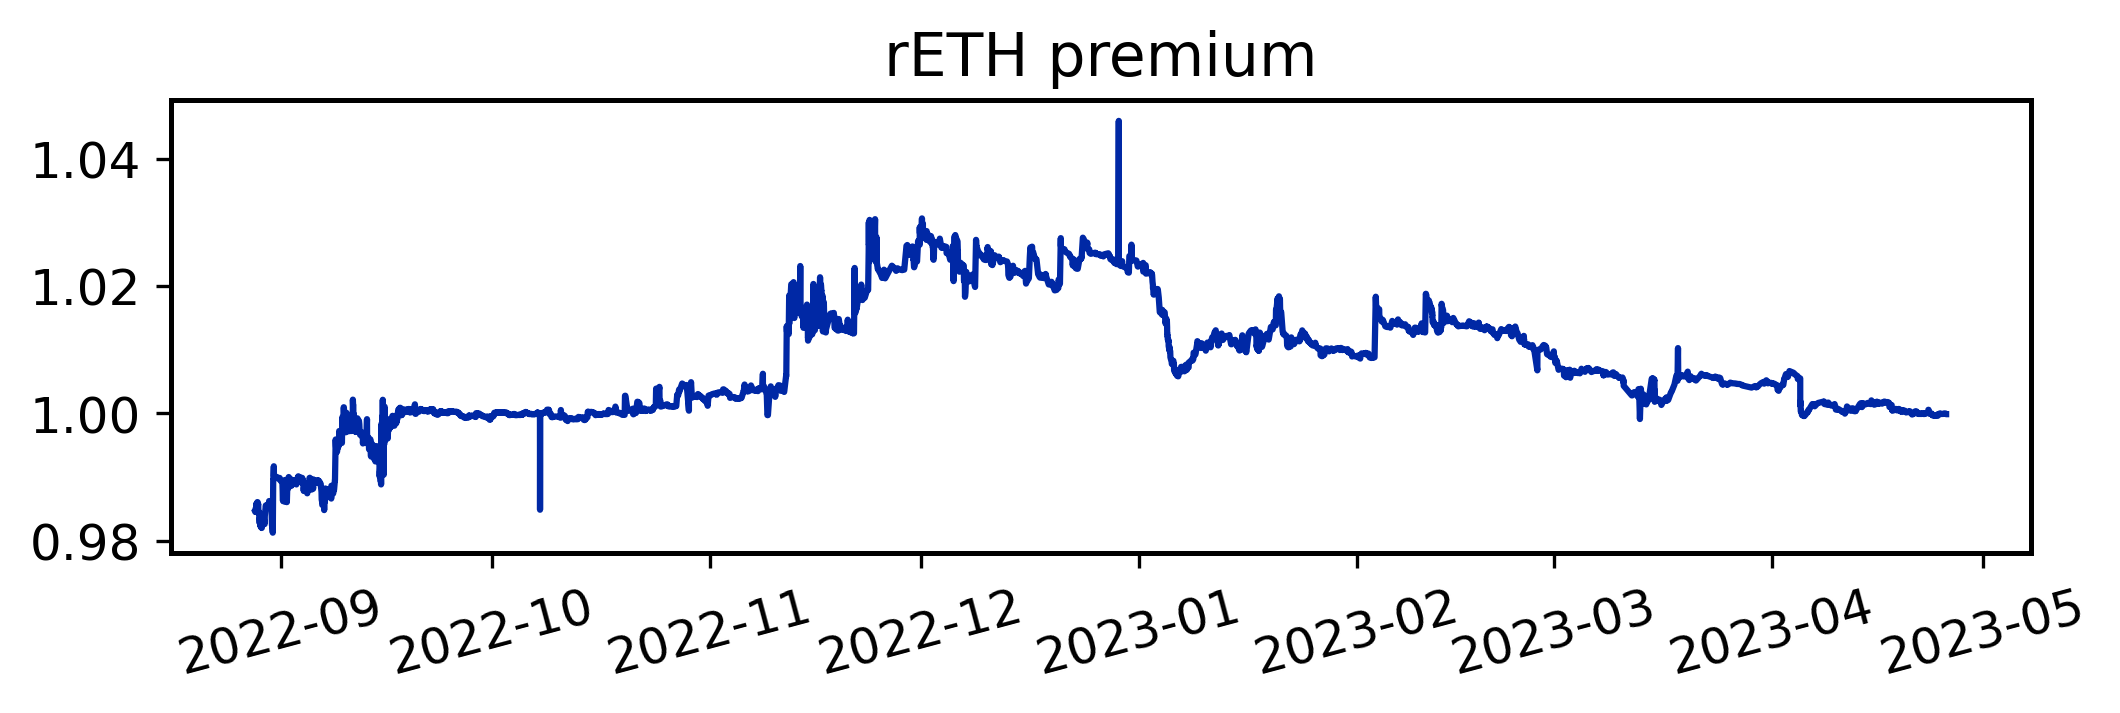

In [72]:
import matplotlib.pyplot as plt
df['time']=pd.to_datetime(df['time'])
df=df.set_index('time')
fig = plt.figure(figsize=(8, 2))
plt.plot(df['reth_premium'])
plt.xticks(rotation=15)
plt.title('rETH premium')


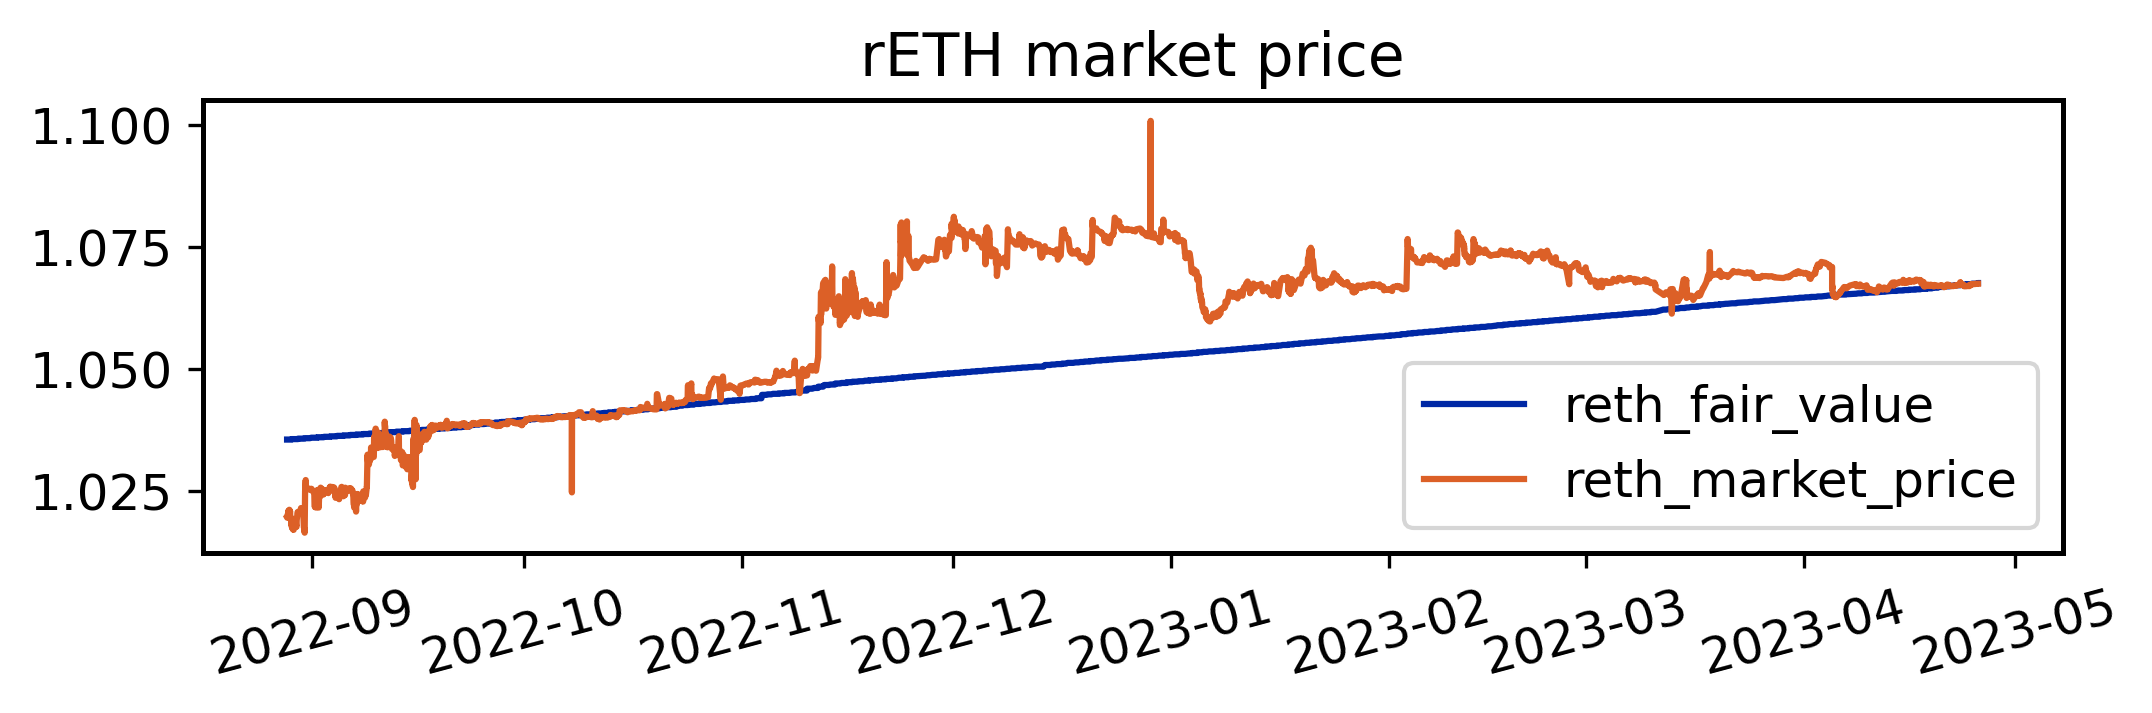

In [73]:
fig = plt.figure(figsize=(8, 2))
plt.plot(df['reth_fair_value'], label='reth_fair_value')
plt.plot(df['reth_market_price'],label='reth_market_price')
plt.xticks(rotation=15)
plt.legend()
plt.title('rETH market price')
plt.show()

In [97]:
def transform_to_daily(df, col):
   df = df.copy()
   df = df.sort_index()
   days_ = [str(date) for date in sorted(set(df.index.date.tolist()))]
   df_daily = {}
   for day in days_:
      df_daily[day]={} 
      df_daily[day]['open']=df.loc[day][col][0]
      df_daily[day]['close']=df.loc[day][col][-1]
      df_daily[day]['high']=df.loc[day][col].max()
      df_daily[day]['low']=df.loc[day][col].min()
   df_daily = pd.DataFrame.from_dict(df_daily, orient='index')
   df_daily.index = pd.to_datetime(df_daily.index)
   return df_daily

def hex_to_rgb(value):
    """Return (red, green, blue) for the color given as #rrggbb."""
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv+1, lv // 3))



In [98]:
df.columns

Index(['Unnamed: 0', 'reth_fair_value', 'reth_market_price', 'reth_premium'], dtype='object')

In [99]:
reth_fair = transform_to_daily(df,'reth_fair_value')
reth_market = transform_to_daily(df,'reth_market_price')

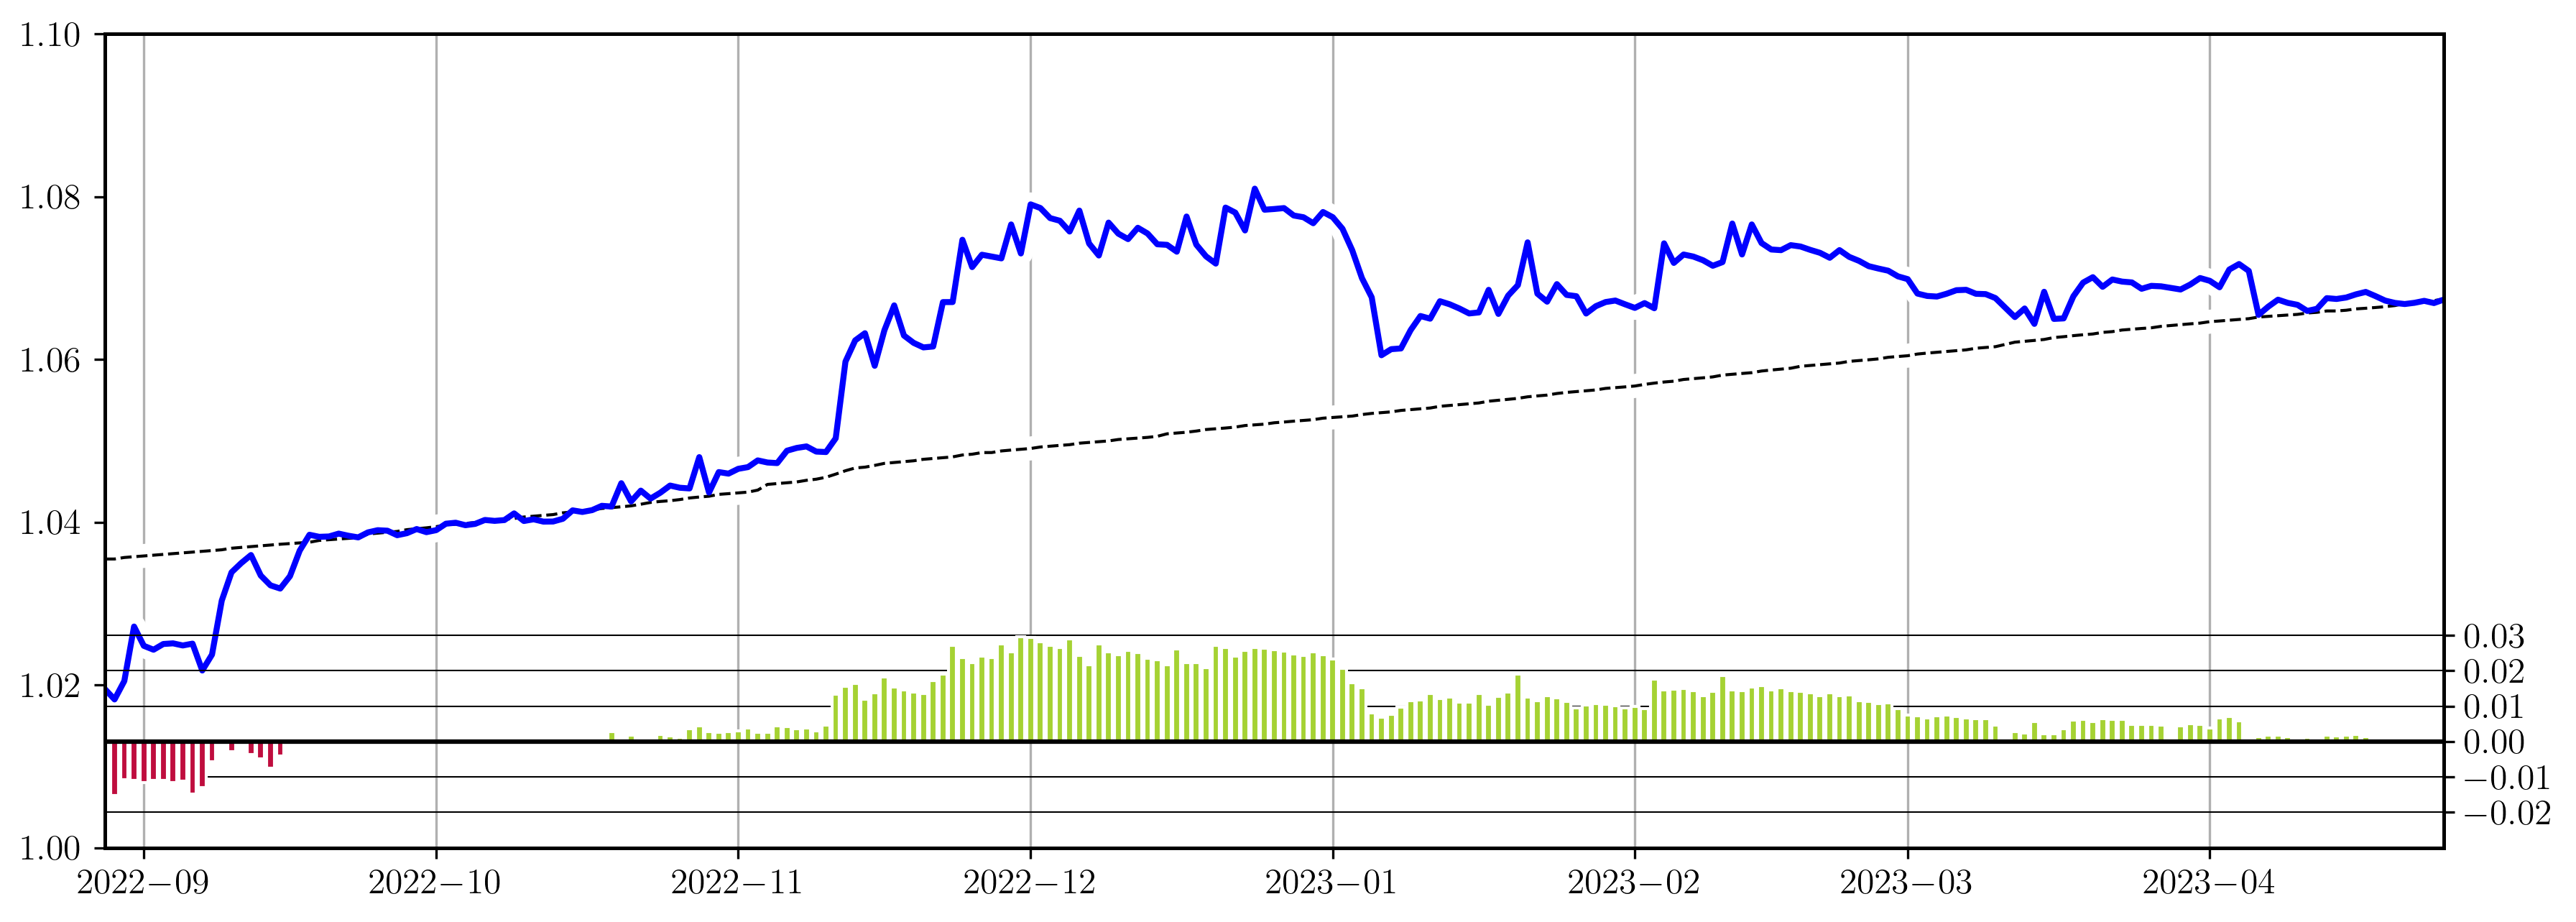

In [244]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

plt.style.use('uzh')
plt.rcParams["font.family"] = "serif"
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)
width = 1
width2 = .3

ax2 = ax.twinx()
ax2.set_axisbelow(True)
ax2.axhline(0,c= 'k')
ax2.set_yticks([-0.02, -0.01,0, 0.01, 0.02,0.03])
grid_2 = ax2.grid(axis = 'y', lw = 0.5, color='k', zorder=-200)

ax.set_axisbelow(True)
ax.set_xlim(reth_fair.index.min(), reth_fair.index.max())
ax.set_ylim(1,1.1)
ax.grid(axis='x', zorder=100)

ax.plot(reth_fair.index, reth_fair.open, color = 'k', lw=1, ls = '--')
ax.plot(reth_fair.index, reth_market.open, color = 'b', lw=2) # path_effects=[pe.Stroke(linewidth=10, foreground='w'), pe.Normal()])

#----------------CANDLESTICKS------------------
#ax.bar(reth_market.index, reth_market.high-reth_market.low, width2, bottom=reth_market.low,
#       color=(reth_market.close-reth_market.open > 0).map({True: '#A5D233', False: '#BF0D3E'}), alpha =0.5)
#ax.bar(reth_market.index, reth_market.close-reth_market.open, width, bottom=reth_market.open, 
#        color=(reth_market.close-reth_market.open > 0).map({True: '#A5D233', False: '#BF0D3E'}),
#        edgecolor = 'k')

premium = reth_market.close - reth_fair.close
ax2.bar(reth_fair.index, premium, color=(premium > 0).map({True: '#A5D233', False: '#BF0D3E'}),
       edgecolor = 'w', linewidth = 1)
ax2.set_ylim(-0.03, 0.2)
#ax2.set_zorder(ax2.get_zorder()+10)

market = ax.plot(reth_fair.index, reth_fair.open, color = 'w', lw=8, zorder = 1)
fair = ax.plot(reth_fair.index, reth_market.open, color = 'w', lw=8, zorder = 1)

#price = ax.plot(reth_fair.index, reth_market.open, color = 'w', lw=5, zorder=1)
#ax.plot(reth_fair.index, reth_market.open, color = 'b', lw=2, path_effects=[pe.Stroke(linewidth=10, foreground='w'), pe.Normal()])

plt.show()

In [76]:
def resample_stock_data(df, timedelta):
    # make a copy
    df = df.copy()

    # convert index to datetime
    df.index = pd.to_datetime(df.index)

    # sort the index (evidently required by resample())
    df = df.sort_index()


    aggregation_dict = {
        'reth': 'mean', 
         'open': 'sum', 
         'high': 'sum',
         'low': 'sum',
         'close': 'sum',
         'Adj_Close': 'sum'
    }

    rename_dict = {
        'open': 'first',
        'high': 'max_price',
        'low': 'min_price',
        'close': 'last_price',
        'volume': 'vol (shares)',
        'Adj_Close': 'last',
    }


    return (df
      .resample(timedelta)
      .agg(aggregation_dict)
      .rename(columns=rename_dict)
    )

In [381]:
import os

data = []
cwd = os.getcwd()
for file in os.listdir('data/price'):
   filepath = os.path.join(cwd, 'data/price',file)
   _df = pd.read_csv(filepath)
   _df['timestamp']=pd.to_datetime(_df['timestamp'])
   _df=_df.set_index('timestamp')
   _df = transform_to_daily(_df, 'price')
   _df.currency_pair = file.split('.')[0]
   data.append(_df)
   

In [384]:
print(len(data))

9


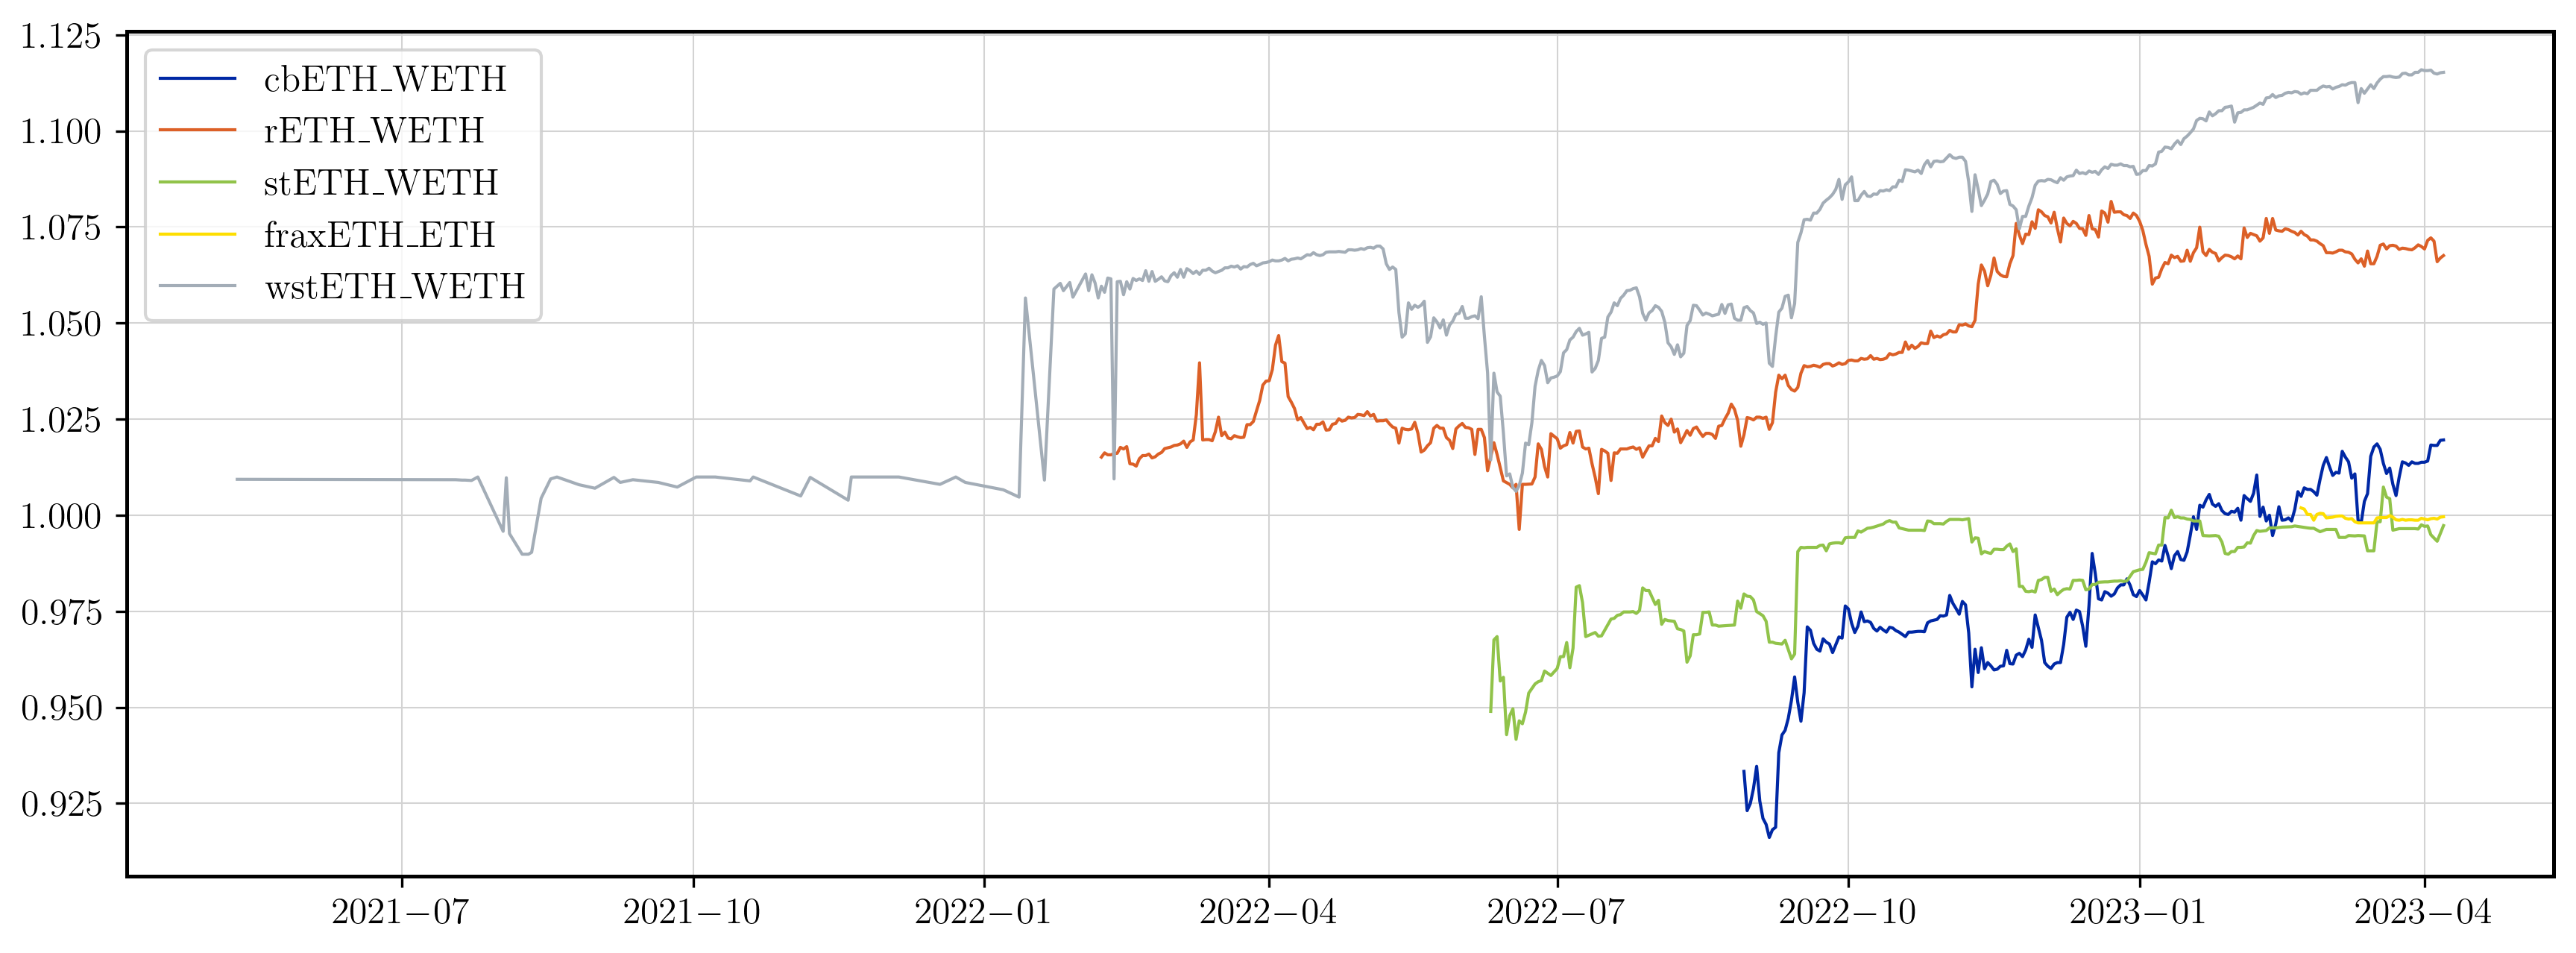

In [385]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for cur in data:
    if cur.currency_pair in ['SD_WETH','WETH_RPL','SWISE_WETH', 'ETH_sETH2']:
        continue
    ax.plot(cur.index, cur.close, lw=1, label = cur.currency_pair)

ax.set_axisbelow(True)
#ax.set_xlim(reth_fair.index.min(), reth_fair.index.max())
#ax.set_ylim(1,1.1)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

In [394]:
import os

data = []
cwd = os.getcwd()
xls = pd.ExcelFile('data/xls/LSD Data ETH.xlsx')
#print(xls.sheet_names)
data_eth_xlsx = []
for sheet in ['ETH', 'wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    _df = xls.parse(sheet)
    _df.dropna(subset=['Date'], inplace=True)
    _df['Date']=pd.to_datetime(_df['Date'])
    _df=_df.set_index('Date')
    _df.columns = _df.columns.str.lower()
    _df.token = sheet
    data_eth_xlsx.append(_df)
   
xls = pd.ExcelFile('data/ETH-USD-STORE.xlsx')
_df = xls.parse('ETH-USD')
_df.dropna(subset=['Date'], inplace=True)
_df['Date']=pd.to_datetime(_df['Date'])
_df=_df.set_index('Date')
_df.columns = _df.columns.str.lower()
_df.token = 'ETH-interest'
interest =  _df.copy()


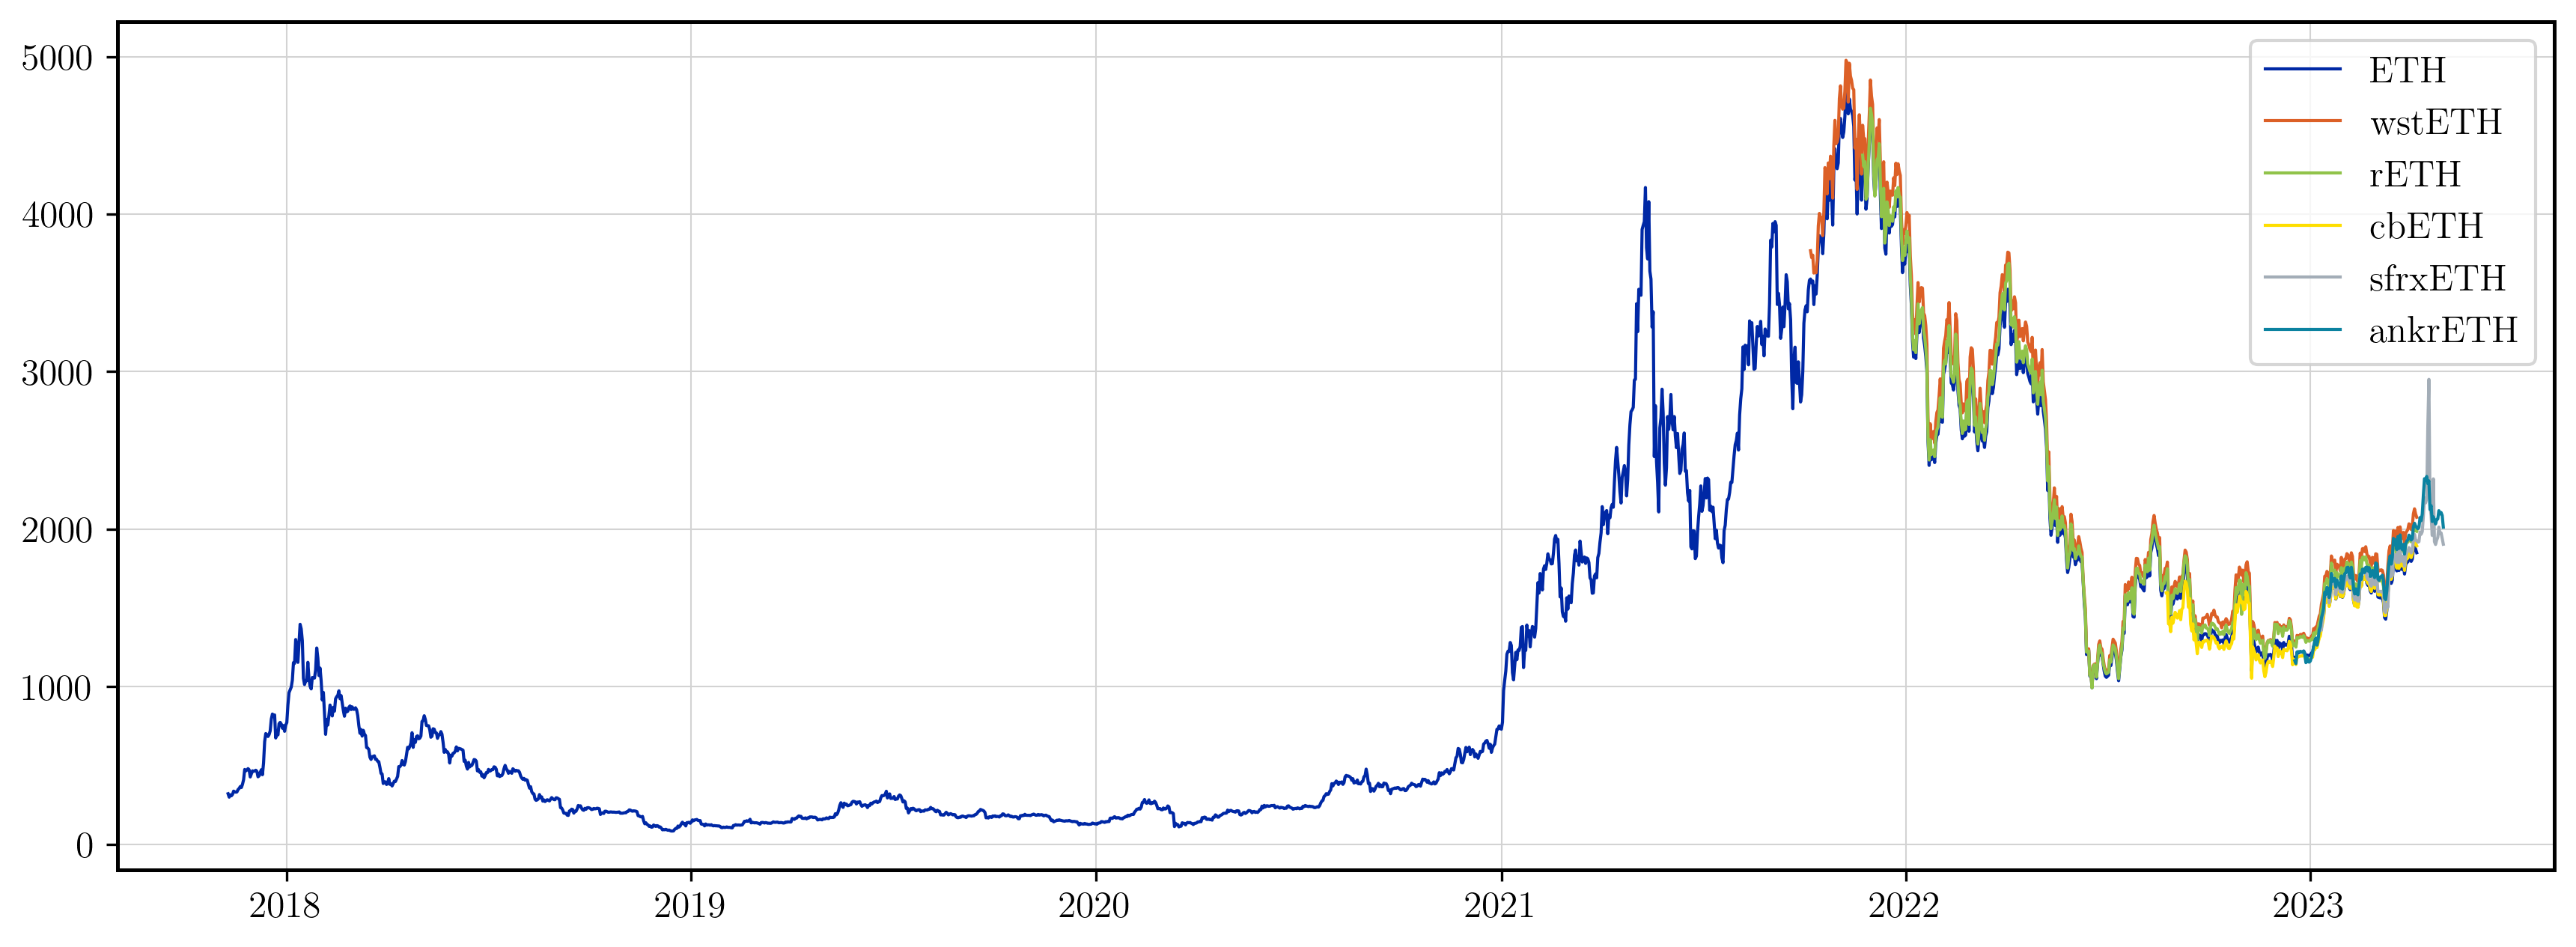

In [391]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for cur in data_eth_xlsx:
    ax.plot(cur.index, cur.close, lw=1, label = cur.token)

ax.set_axisbelow(True)
#ax.set_xlim(reth_fair.index.min(), reth_fair.index.max())
#ax.set_ylim(1,1.1)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

In [392]:

result = pd.concat([d.close for d in data_eth_xlsx], axis=1, join="outer", keys= [d.token for d in data_eth_xlsx])

result = result.div(result['ETH'].values,axis=0)
result = result.drop('ETH', axis=1)


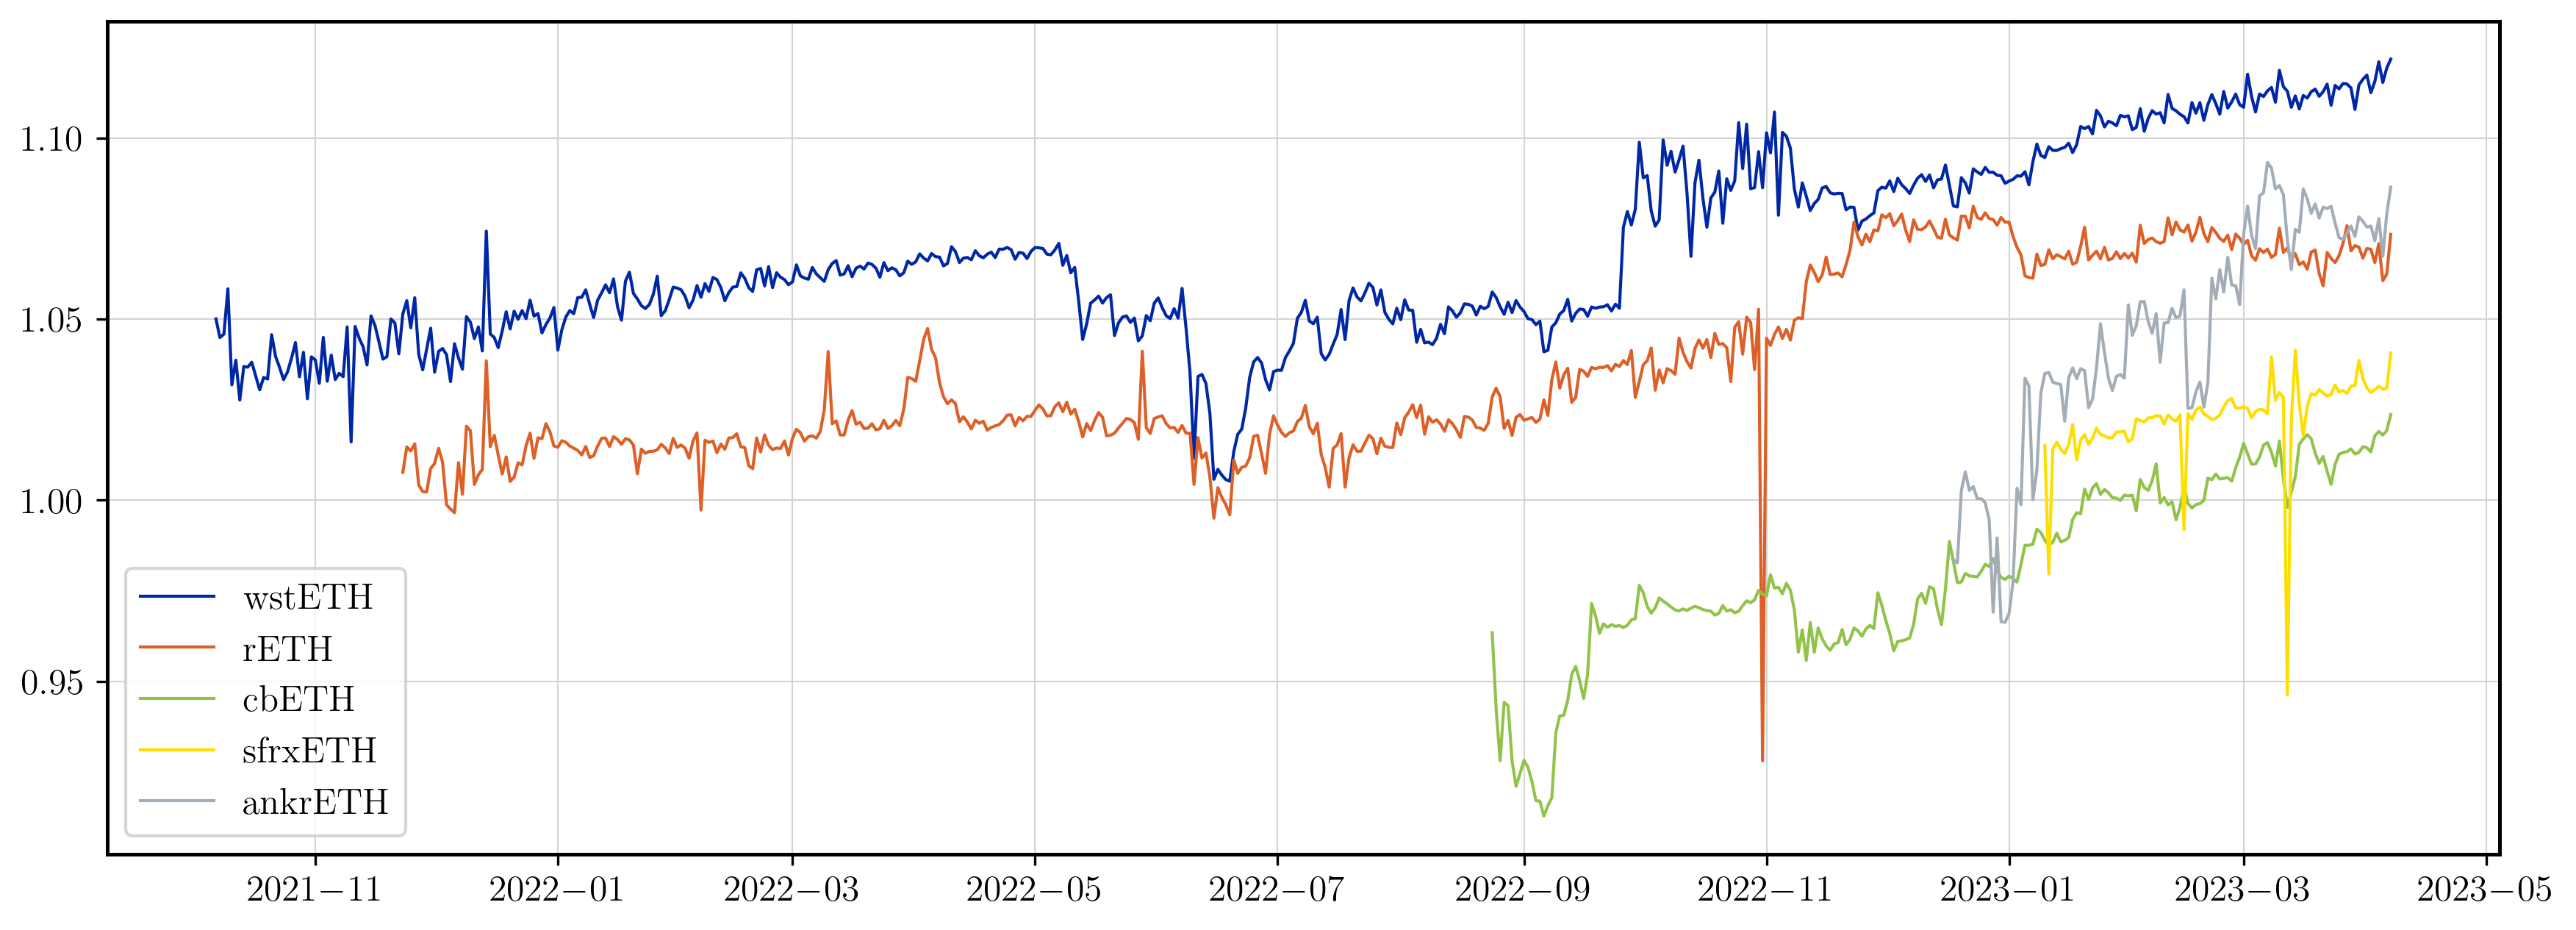

In [393]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in result.columns:
    ax.plot(result.index, result[col], lw=1, label = col)

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

In [404]:
interest['daily']=(1+np.array(interest['eth.store'])/100)**(1/365)
interest['daily_accrued']= interest['daily'].cumprod()

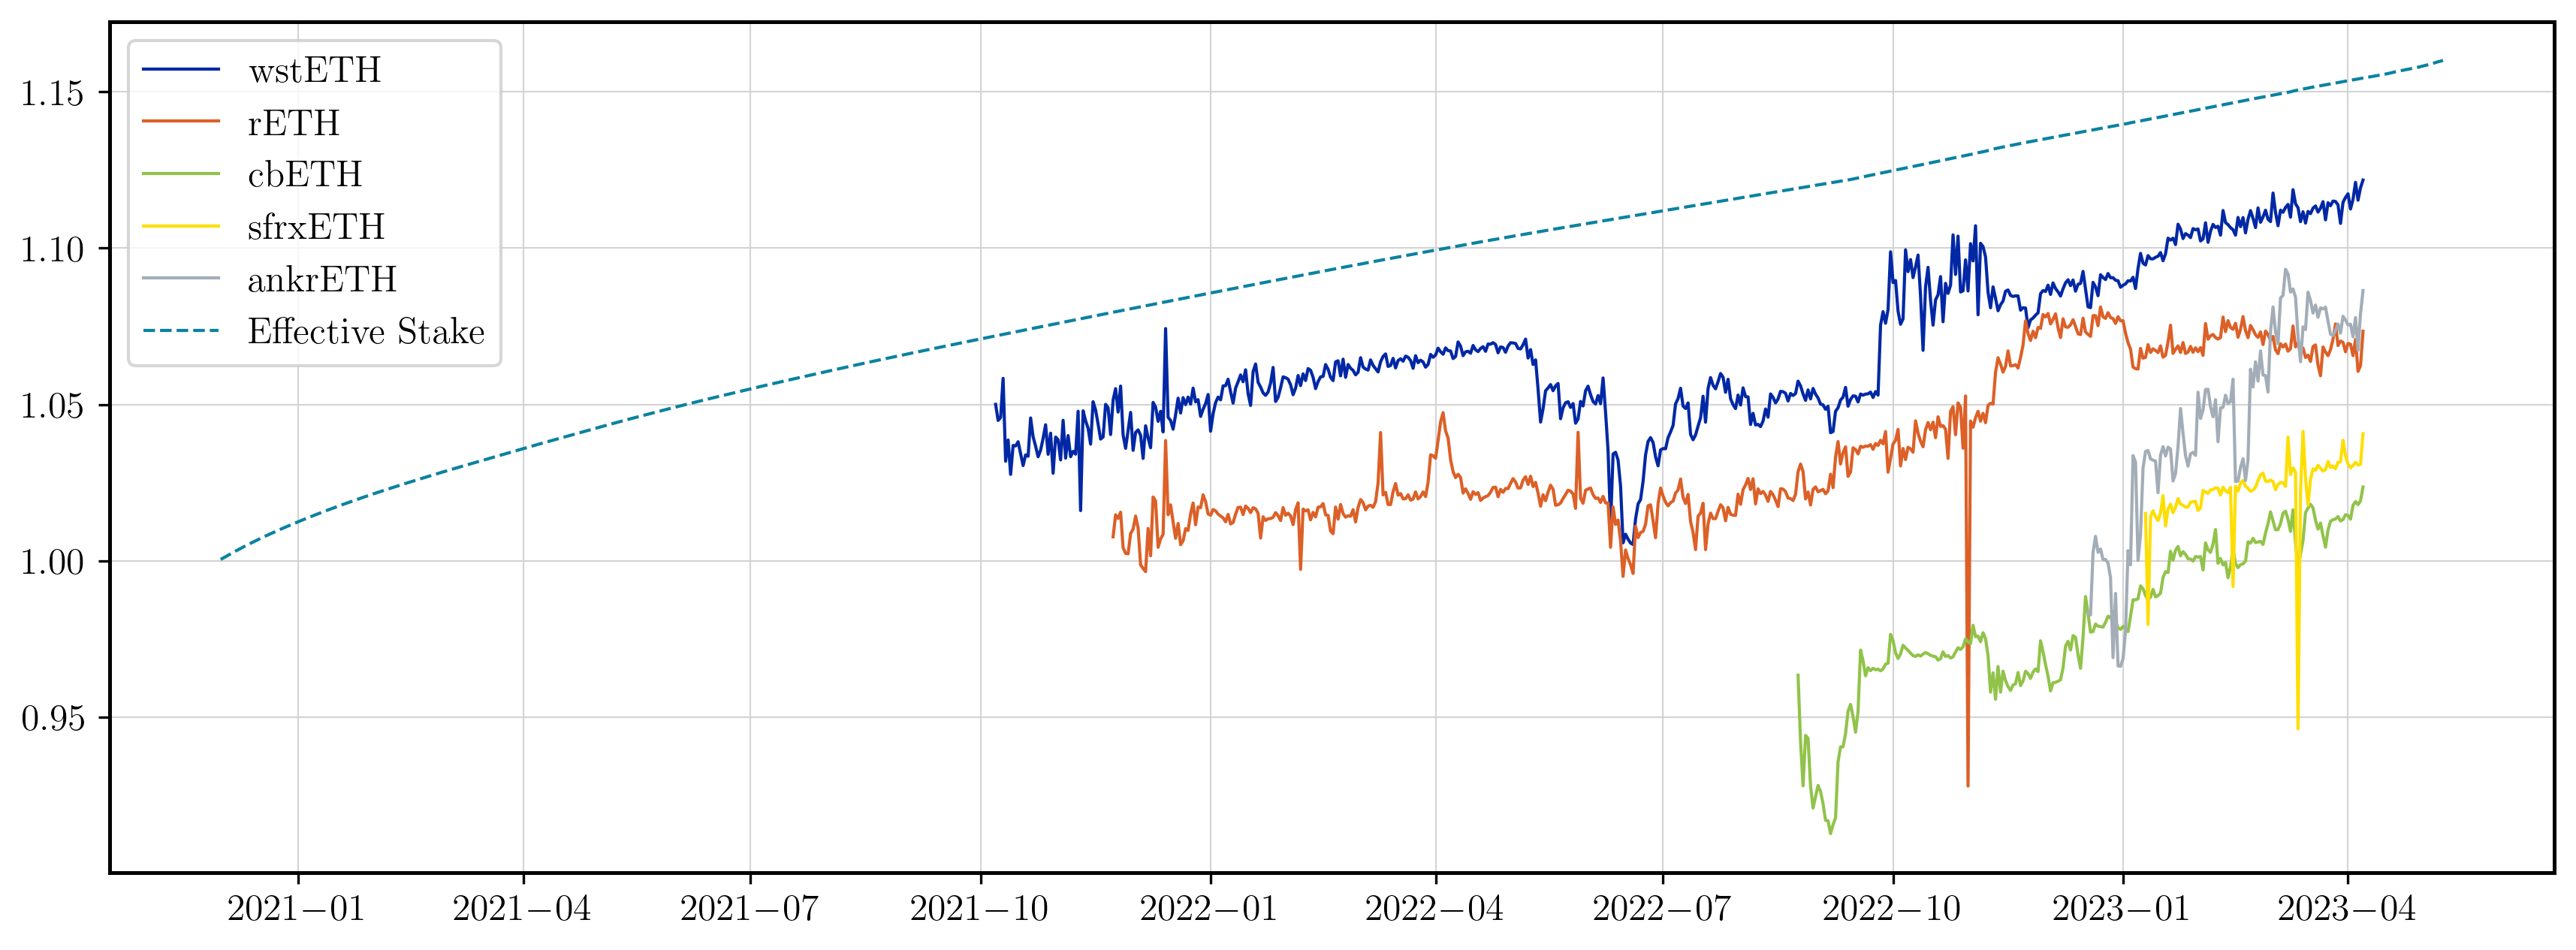

In [413]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in result.columns:
    ax.plot(result.index, result[col], lw=1, label = col)

ax.plot(interest.index, interest['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

In [444]:
result_with_interest = pd.concat([result, interest.daily], axis=1, join="outer")
result_with_interest.dropna(subset=['wstETH'], inplace=True)
result_with_interest['daily_accrued']= result_with_interest['daily'].cumprod()

In [425]:
result_with_interest

,wstETH,rETH,cbETH,sfrxETH,ankrETH,daily
Date,,,,,,
2021-10-07,1.050049,NaN,NaN,NaN,NaN,1.000151
2021-10-08,1.044903,NaN,NaN,NaN,NaN,1.000152
2021-10-09,1.045851,NaN,NaN,NaN,NaN,1.000151
2021-10-10,1.058360,NaN,NaN,NaN,NaN,1.000150
2021-10-11,1.031851,NaN,NaN,NaN,NaN,1.000151
...,...,...,...,...,...,...
2023-04-03,1.115621,1.065619,1.017763,1.030477,1.071639,1.000130
2023-04-04,1.121060,1.070843,1.018963,1.031477,1.077800,1.000125
2023-04-05,1.115341,1.060583,1.017965,1.030642,1.067368,1.000119


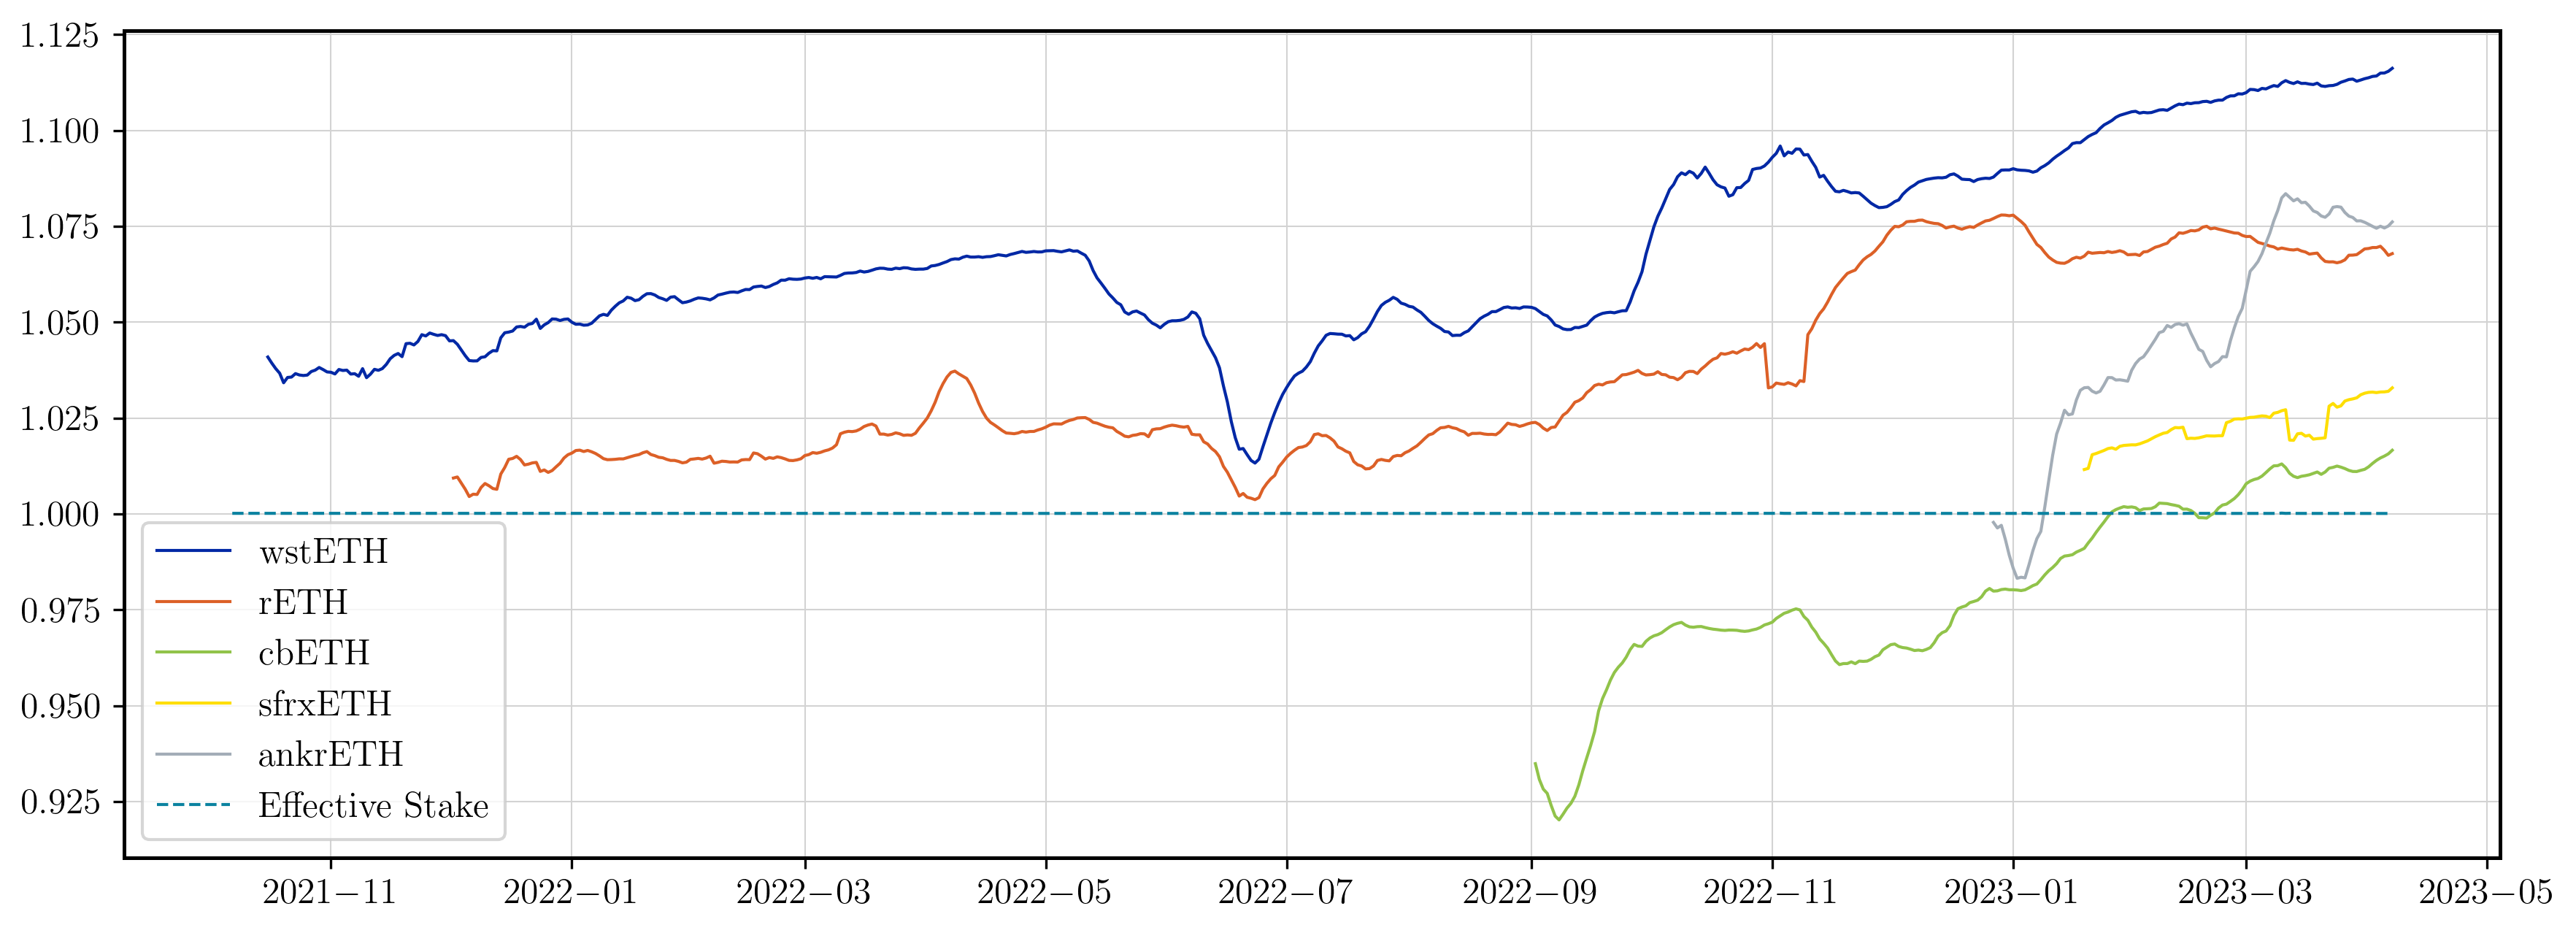

In [431]:
data_to_plot = result_with_interest
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col == 'daily':
        continue
    ax.plot(data_to_plot.index, data_to_plot[col].rolling(window=10).mean(), lw=1, label = col)

ax.plot(data_to_plot.index, data_to_plot['daily'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

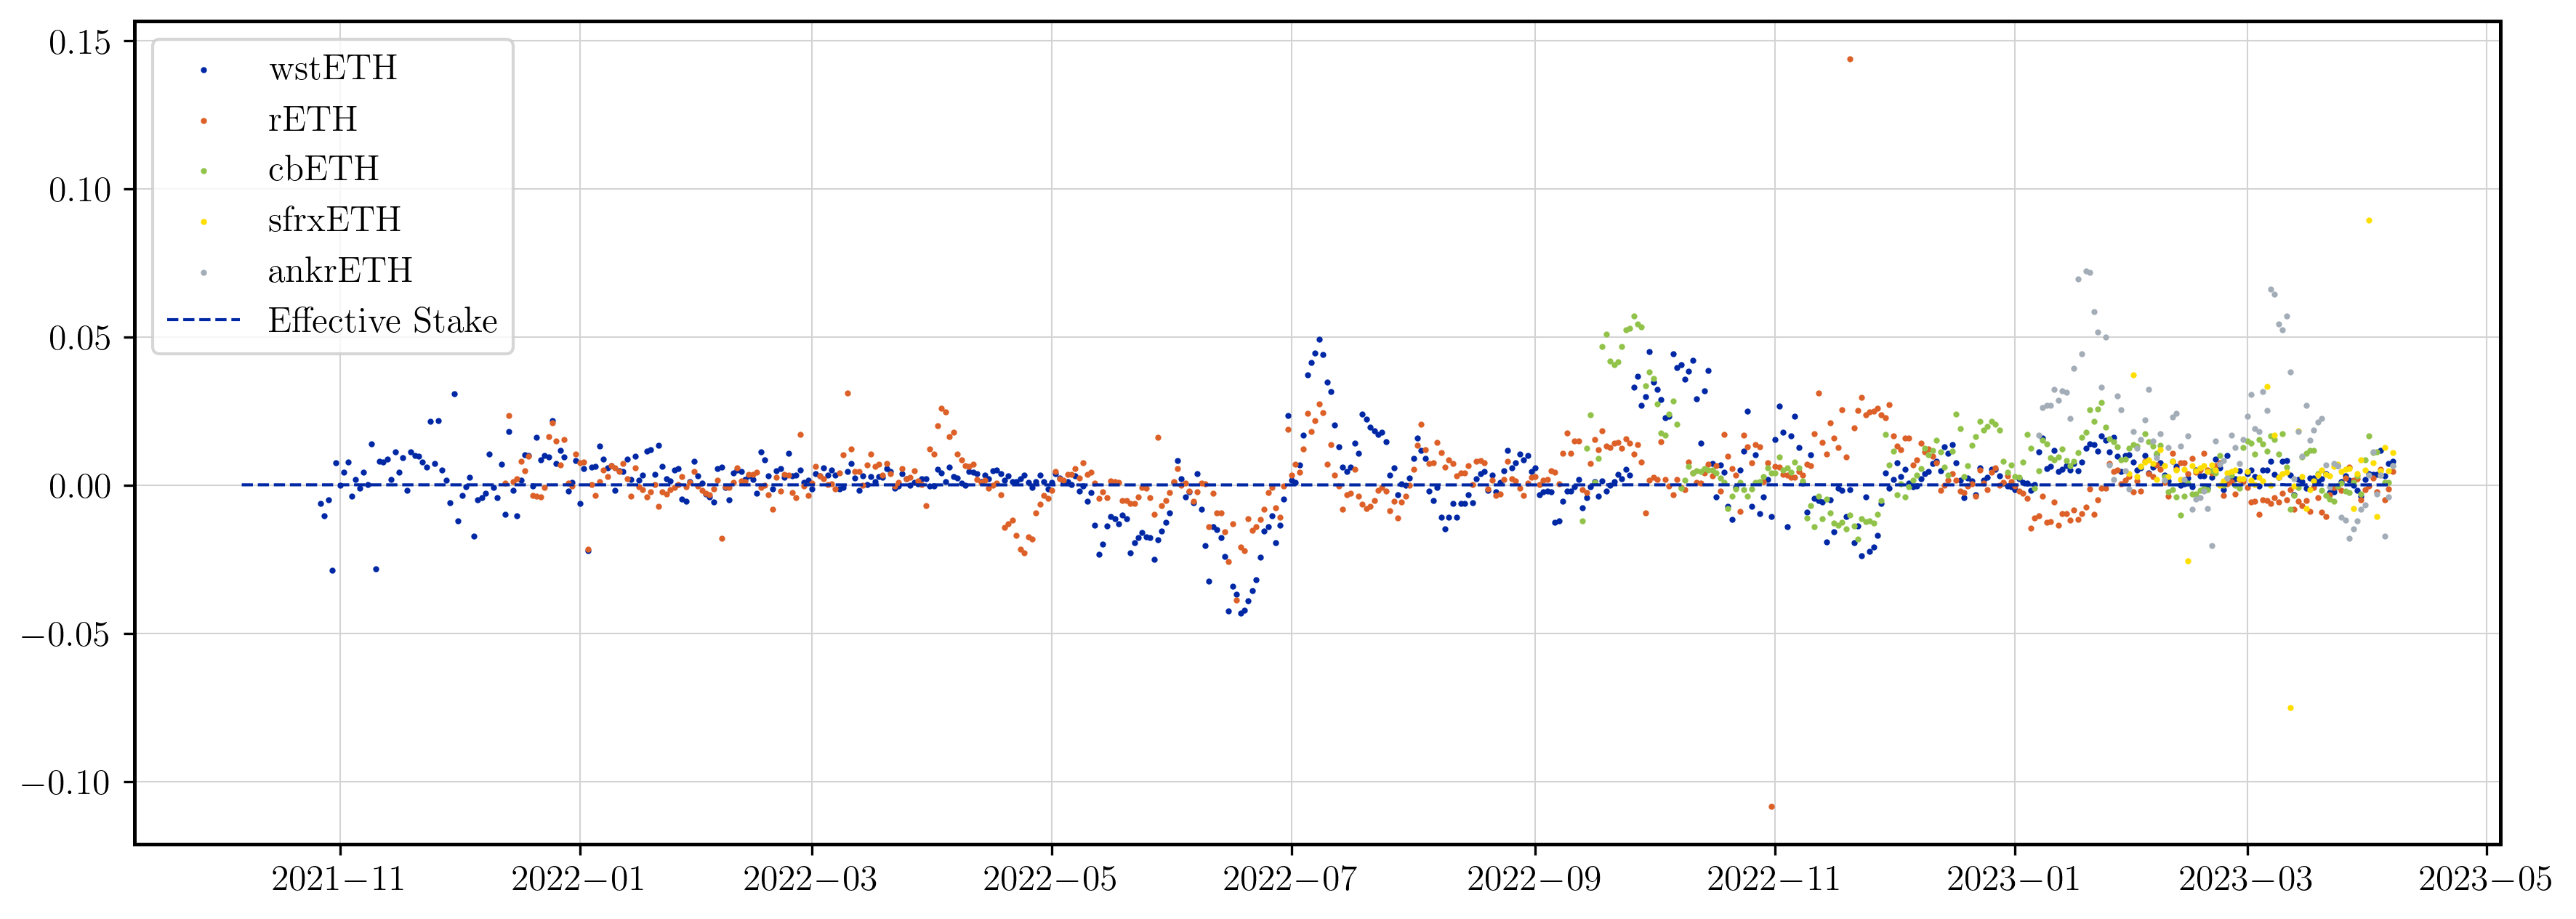

In [443]:
data_to_plot = result_with_interest
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col == 'daily':
        continue
    ax.scatter(data_to_plot.index, data_to_plot[col].pct_change(20), s=1,lw=1, label = col)

ax.plot(data_to_plot.index, data_to_plot['daily']-1, lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')